In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/csv/Dataset/Indian House Prices.csv')
df

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,24599,620.00,1450,Worli,3.0,0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.011696,72.818070
9386,24600,25.00,540,Virar East,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.457969,72.814214
9387,24601,190.00,1267,Belapur,3.0,1,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.363160,80.723436
9388,24602,149.00,1245,Airoli,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182


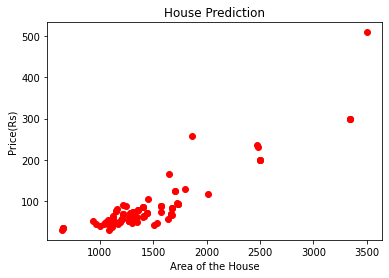

In [26]:
X = df[['Area']].loc[:100]
y = df['Price'].loc[:100]

import matplotlib.pyplot as plt
plt.scatter(X,y,marker='o',c='r')
plt.title('House Prediction')
plt.xlabel('Area of the House')
plt.ylabel('Price(Rs)')
plt.show()

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=10)
X_train.shape

(70, 1)

In [29]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train,y_train)

LinearRegression()

In [30]:
print("Intercept: ",slr.intercept_)
print("Coefficient: ",slr.coef_)

Intercept:  -72.68431203100201
Coefficient:  [0.10854897]


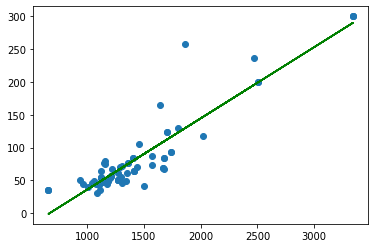

In [31]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train)
plt.plot(X_train, -72.684312+ 0.10854*X_train,'g')
plt.show()

In [32]:
y_pred = slr.predict(X_test)
x_pred = slr.predict(X_train)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 48.89053571  51.38716205  94.48110362  83.40910856 198.90521391
  59.74543283  59.74543283  62.45915711 307.23708717  69.62338921
 115.648153   108.59246987 109.13521473  75.15938674 196.51713655
  98.28031761  98.28031761 104.79325588  -2.23602972  44.54857687
  79.71844354  51.60425999  68.86354642 114.67121226  69.62338921
  48.89053571  40.20661802  83.40910856  59.31123695  79.82699251
  51.60425999]


In [33]:
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
slr_diff

,Actual value,Predicted value
79,49.28000,48.890536
63,45.14000,51.387162
85,46.04000,94.481104
39,71.05000,83.409109
38,200.00000,198.905214
3,67.97000,59.745433
19,67.97000,59.745433
66,88.68000,62.459157
90,510.00000,307.237087
14,72.09999,69.623389


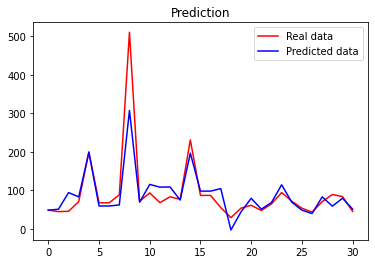

In [34]:
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()